In this notebook, we'll be using pandas to work with time series of events. The following imports enable this without repeating them in all of the later portions.

In [1]:
import pandas as pd

# Visualizing Service Level Indicators

A _service level indicator_ (SLI) is a measure of the quality of service being provided by a service. Following the recommendation in Bayer et al. (2018), we will consider SLIs as a ratio of _good events_ to _valid events_. 

We can explore how to visualize an SLI by working through an example. The following data buckets the events into 6-hour periods, covering 9 days. Each row provides a labeled for the time period, the number of valid events, and the number of those events that are considered good.

In [2]:
event_series = [
    ('2019-05-01 00:00:00', 8000, 8000),
    ('2019-05-01 06:00:00', 10000, 9780),
    ('2019-05-01 12:00:00', 14000, 13972),
    ('2019-05-01 18:00:00', 9000, 8997),
    ('2019-05-02 00:00:00', 10000, 876),
    ('2019-05-02 06:00:00', 16000, 13957),
    ('2019-05-02 12:00:00', 18000, 18000),
    ('2019-05-02 18:00:00', 12000, 12000),
    ('2019-05-03 00:00:00', 10000, 10000),
    ('2019-05-03 06:00:00', 20000, 20000),
    ('2019-05-03 12:00:00', 17000, 17000),
    ('2019-05-03 18:00:00', 9000, 9000),
    ('2019-05-04 00:00:00', 11000, 11000),
    ('2019-05-04 06:00:00', 15000, 15000),
    ('2019-05-04 12:00:00', 16000, 15000),
    ('2019-05-04 18:00:00', 12000, 10592),
    ('2019-05-05 00:00:00', 8000, 7995),
    ('2019-05-05 06:00:00', 12000, 12000),
    ('2019-05-05 12:00:00', 15000, 15000),
    ('2019-05-05 18:00:00', 12000, 12000),
    ('2019-05-06 00:00:00', 9000, 9000),
    ('2019-05-06 06:00:00', 28000, 26000),
    ('2019-05-06 12:00:00', 19000, 18572),
    ('2019-05-06 18:00:00', 12000, 12000),
    ('2019-05-07 00:00:00', 10000, 10000),
    ('2019-05-07 06:00:00', 15000, 15000),
    ('2019-05-07 12:00:00', 12000, 12000),
    ('2019-05-07 18:00:00', 9000, 9000),
    ('2019-05-08 00:00:00', 10000, 9987),
    ('2019-05-08 06:00:00', 14000, 12851),
    ('2019-05-08 12:00:00', 17000, 16252),
    ('2019-05-08 18:00:00', 12000, 12000),
    ('2019-05-09 00:00:00', 11000, 11000),
    ('2019-05-09 06:00:00', 19000, 17000),
    ('2019-05-09 12:00:00', 13000, 11000),
    ('2019-05-09 18:00:00', 10000, 10000),    
]

We'll start by converting this pair of time series into a pandas dataframe, and computing both the indicator and the gap (1 - indicator):

In [3]:
data={
    'timestamp': [e[0] for e in event_series],
    'valid_events': [e[1] for e in event_series],
    'good_events': [e[2] for e in event_series]
}

df = pd.DataFrame(data, columns=['timestamp', 'valid_events', 'good_events'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df['timestamp']
del df['timestamp']

df['bad_events'] = df['valid_events'] - df['good_events']
df['indicator'] = df['good_events'] / df['valid_events']
df['gap'] = 1.0 - df['indicator']

df

,valid_events,good_events,bad_events,indicator,gap
timestamp,,,,,
2019-05-01 00:00:00,8000,8000,0,1.000000,0.000000
2019-05-01 06:00:00,10000,9780,220,0.978000,0.022000
2019-05-01 12:00:00,14000,13972,28,0.998000,0.002000
2019-05-01 18:00:00,9000,8997,3,0.999667,0.000333
2019-05-02 00:00:00,10000,876,9124,0.087600,0.912400
2019-05-02 06:00:00,16000,13957,2043,0.872313,0.127687
2019-05-02 12:00:00,18000,18000,0,1.000000,0.000000
2019-05-02 18:00:00,12000,12000,0,1.000000,0.000000
2019-05-03 00:00:00,10000,10000,0,1.000000,0.000000


From this, we can visualize a seven-day rolling SLI as it would appear at the end of the seventh day:

In [4]:
df['2019-05-01 00:00:00':'2019-05-07 23:59:59'][['indicator', 'gap']].plot.area(linewidth=0)

With this visualization, we can easily see the degree of impact on the service that occurred at the beginning of day 2.

Since we have additional data in the series, we can also look at what the resulting rolling 7-day visualization would be after the end of day 9:

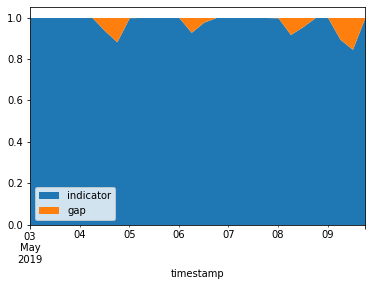

In [5]:
df['2019-05-03 00:00:00':'2019-05-09 23:59:59'][['indicator', 'gap']].plot.area(linewidth=0)

# Visualizing Service Level Objectives

A service level objective (SLO) is constructed over an SLI. Since the SLI above is covered in small (6-hour increments) of time, we can construct our SLO over a week-long period. A useful way of visualizng an SLO is to plot the *remaining error budget* for the period covered by the SLO. The error budget is simply defined as 100 - SLO.

To start with, we need to construct the rolling timeseries for the valid and good events:

error budget: 18400


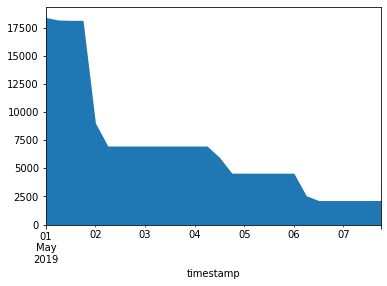

In [6]:
availability_target = 0.95

window_df = df['2019-05-01 00:00:00':'2019-05-07 23:59:59']
error_budget = int(window_df['valid_events'].sum() * (1-availability_target))
print('error budget: {}'.format(error_budget))
budget_df = error_budget - window_df['bad_events'].cumsum()
budget_df.plot.area(linewidth=0)

error budget: 18850


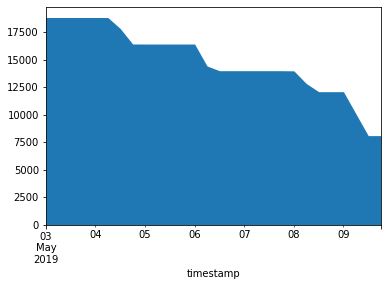

In [7]:
availability_target = 0.95

window_df = df['2019-05-03 00:00:00':'2019-05-09 23:59:59']
error_budget = int(window_df['valid_events'].sum() * (1-availability_target))
print('error budget: {}'.format(error_budget))
budget_df = error_budget - window_df['bad_events'].cumsum()
budget_df.plot.area(linewidth=0)

# References

Beyer, Betsy, Niall Richard Murphy, David K. Rensin, Kent Kawahara, and Stephen Thorne. 2018. _The Site Reliability Workbook: Practical Ways to Implement SRE_. Sebastopol, CA: O'Reilly.